<b>Express the cars.data.csv data as a series of bar graphs.  The x-axis represents a feature and the y-axis is the frequency in the sample.  Do this with the 'buying', 'maint', 'safety', and 'doors' fields with one plot for each for a total of four.  Make each graph a subplot of a single output.  Something like this: </b>

In [146]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.image as mpimg
from scipy.optimize import curve_fit
plt.style.use('ggplot')
import mahotas as mh
from scipy import misc
from scipy import ndimage
from skimage import filters

In [147]:
df = pd.read_csv('data\\cars.data.csv', names =['buying','maint','doors','persons','lug_boot','safety','class_values'])
df

,buying,maint,doors,persons,lug_boot,safety,class_values
0,high,high,2,4,med,low,unacc
1,high,high,4,more,small,high,acc
2,high,high,4,more,big,low,unacc
3,high,low,2,more,big,high,acc
4,vhigh,low,3,2,med,med,unacc
5,low,high,2,2,small,low,unacc
6,med,med,4,more,med,high,vgood
7,low,low,3,2,big,med,unacc
8,vhigh,low,2,2,small,low,unacc
9,vhigh,high,4,4,med,low,unacc


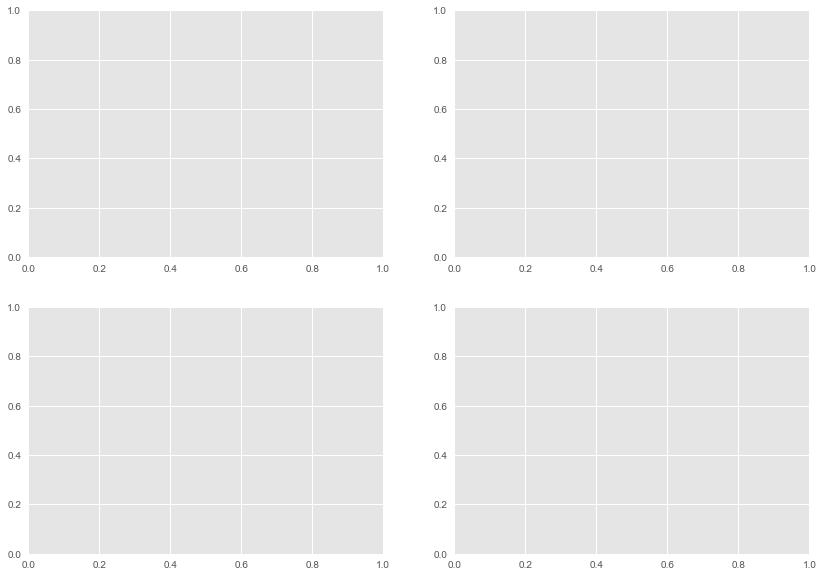

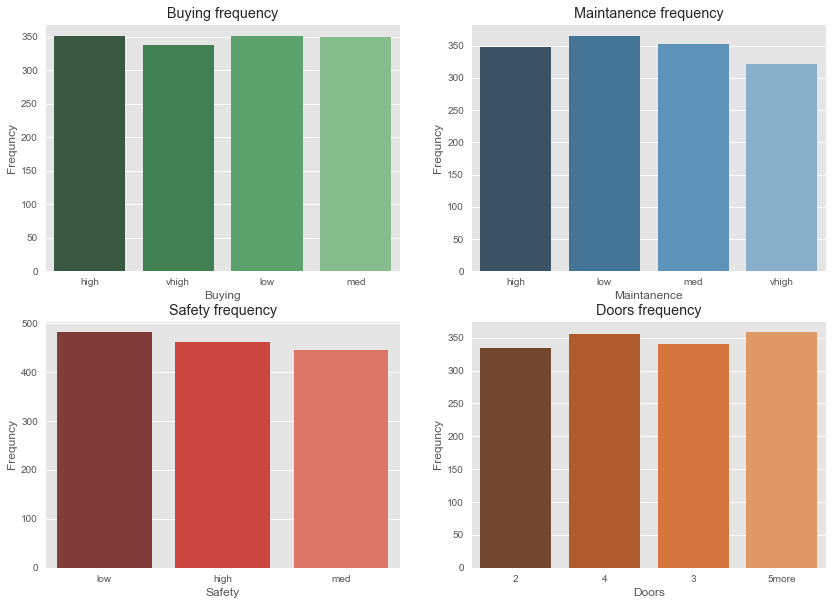

In [148]:
fig = plt.figure()
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(223)
ax4 = fig.add_subplot(224)

plt.rcParams['figure.figsize'] = (14,10)


#Count plot of Buying
sns.countplot(x="buying", data=df, palette="Greens_d",ax=ax1)
ax1.set(xlabel = "Buying" ,ylabel = "Frequncy") 
ax1.set_title("Buying frequency")

#Count plot of Maintanence
sns.countplot(x="maint", data=df, palette="Blues_d",ax=ax2)
ax2.set(xlabel = "Maintanence" ,ylabel = "Frequncy") 
ax2.set_title("Maintanence frequency")

#Count plot of Safety
sns.countplot(x="safety", data=df, palette="Reds_d",ax=ax3)
ax3.set(xlabel = "Safety" ,ylabel = "Frequncy") 
ax3.set_title("Safety frequency")

#Count plot of Doors
sns.countplot(x="doors", data=df, palette="Oranges_d",ax=ax4)
ax4.set(xlabel = "Doors" ,ylabel = "Frequncy") 
ax4.set_title("Doors frequency")
sns.plt.show()

<b>Plot your results from the linear regression in homework 5 and 7 (for any of the provided data sets).  The plot should include.  1) a scatter of the points in the .csv file 2) a line showing the regression line (either from the calculation in homework 5 or line-fitting from homework 7).  3) something on the plot that specifies the equation for the regression line.  Something like this: </b>


In [149]:
df_br = pd.read_csv('data\\brainandbody.csv', names =['animal','body','brain'], skiprows=1)
df_br

,animal,body,brain
0,Lesser short-tailed shrew,0.005,0.14
1,Little brown bat,0.010,0.25
2,Big brown bat,0.023,0.30
3,Mouse,0.023,0.40
4,Musk shrew,0.048,0.33
5,Star-nosed mole,0.060,1.00
6,E. American mole,0.075,1.20
7,Ground squirrel,0.101,4.00
8,Tree shrew,0.104,2.50
9,Golden hamster,0.120,1.00


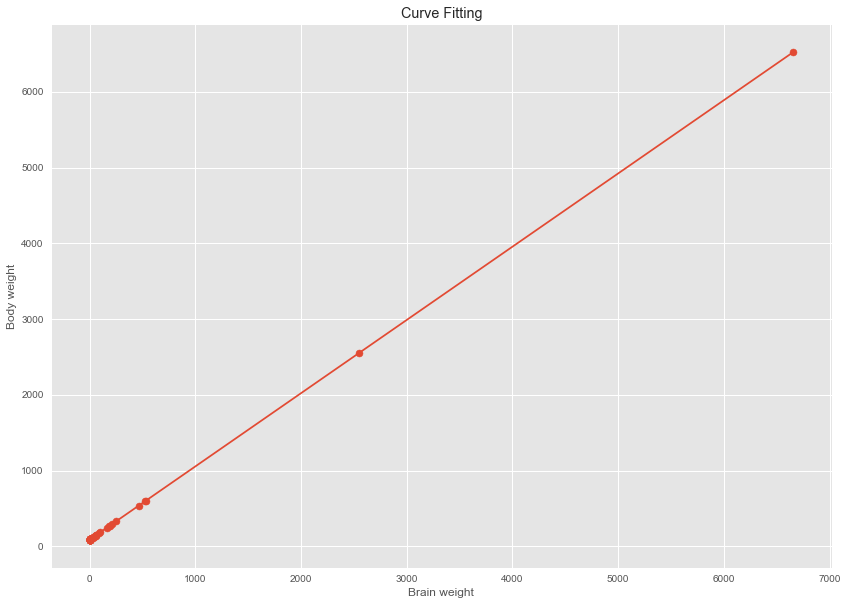

[  0.96649637  91.00439621]


In [150]:
def func(br, a, b):
    return(a*br+b)

def scipy_curve_fitting(br, bo):
    fitParams, fitCov = curve_fit(func, br, bo)
    return fitParams, fitCov

fitParams, fitCov = scipy_curve_fitting(df_br.body,df_br.brain)
plt.plot(df_br.body,func(df_br.body, fitParams[0], fitParams[1]))

plt.scatter(df_br.body,func(df_br.body, fitParams[0], fitParams[1]))
plt.title('Curve Fitting')
plt.xlabel('Brain weight')
plt.ylabel('Body weight')
plt.show()
print(fitParams)

<b>Create an overlay of the center points found in objects.png from homework 8.  The image should be in the background and the object centers can be small circles or points at or around the center points.  Something like this:</b>


Centers of objects
[[ 255.03027688  271.34825881]
 [  74.22379372  508.30787049]
 [ 160.24149853  182.78684884]
 [ 148.16008547  409.57749756]
 [ 306.70526854  152.23628536]
 [ 370.17718991  418.19401536]
 [ 297.9325207   269.35617755]
 [ 399.36068093   93.97602614]
 [ 437.08895156  171.25508816]]


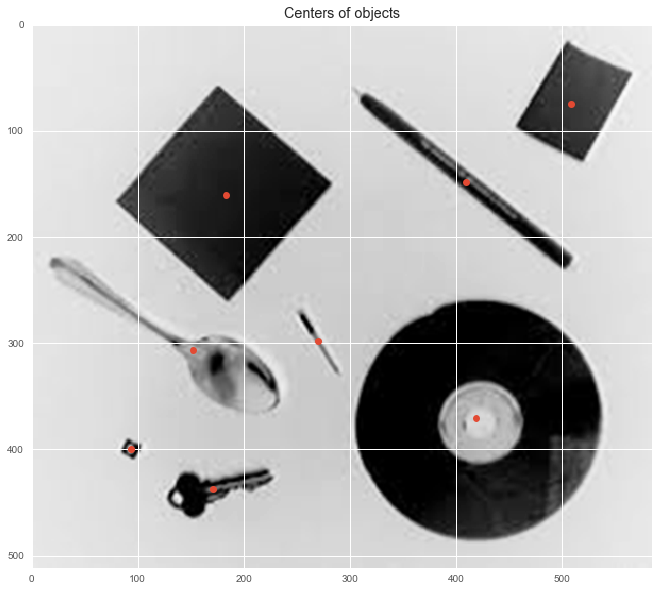

In [151]:
obj = mh.imread('data/objects.png',as_grey=True)

threshed  = (obj > obj.mean())
th1 = mh.gaussian_filter(threshed,2)
seed, count = mh.label(th1)

print("Centers of objects")
centers = mh.center_of_mass(obj,seed)

xcenter = centers[1:,1]
ycenter = centers[1:,0]

plt.imshow(obj)
plt.plot(xcenter, ycenter, 'o')
print(centers)  

plt.title('Centers of objects')
plt.show()

<b>Plot a line graph that shows the hour by hour change in number of server requests from the HTTP in homework 9.  The x-axis is the discrete hour intervals (e.g. 13:00 – 14:00) and the y-axis is the number of requests.  Something like this: </b>

In [152]:
df = pd.read_csv('data\\epa_http.txt', sep=r'\s*\[', engine='python', \
                 names =['host_name','time1','link','response','size'])

#time
df['time']= df['time1'].str.extract('(.*\])', expand = False).map(lambda x: x.replace(']',''))

#Bytes
df['size']= df['time1'].str.extract('(\s\d{3}\s\d*-?)', expand = False).map(lambda x: 0 if str(x.strip())[4:]=='-' else str(x)[4:])
#Response
df['response']= df['time1'].str.extract('(\s\d{3})', expand = False)
#Link
df['link']= df['time1'].str.extract('(\s\".*\")', expand = False)
#Clean unwanted columns 
del df['time1']
df

,host_name,link,response,size,time
0,141.243.1.172,"""GET /Software.html HTTP/1.0""",200,1497,29:23:53:25
1,query2.lycos.cs.cmu.edu,"""GET /Consumer.html HTTP/1.0""",200,1325,29:23:53:36
2,tanuki.twics.com,"""GET /News.html HTTP/1.0""",200,1014,29:23:53:53
3,wpbfl2-45.gate.net,"""GET / HTTP/1.0""",200,4889,29:23:54:15
4,wpbfl2-45.gate.net,"""GET /icons/circle_logo_small.gif HTTP/1.0""",200,2624,29:23:54:16
5,wpbfl2-45.gate.net,"""GET /logos/small_gopher.gif HTTP/1.0""",200,935,29:23:54:18
6,140.112.68.165,"""GET /logos/us-flag.gif HTTP/1.0""",200,2788,29:23:54:19
7,wpbfl2-45.gate.net,"""GET /logos/small_ftp.gif HTTP/1.0""",200,124,29:23:54:19
8,wpbfl2-45.gate.net,"""GET /icons/book.gif HTTP/1.0""",200,156,29:23:54:19
9,wpbfl2-45.gate.net,"""GET /logos/us-flag.gif HTTP/1.0""",200,2788,29:23:54:19


In [153]:
df['time_date'] = pd.to_datetime(df['time'],format='%d:%H:%M:%S')
df['hours'] = df.time_date.dt.hour
#Hourly request count

df_group = df[['host_name','hours']].groupby('hours').count() 
df_group.

SyntaxError: invalid syntax (<ipython-input-153-7e24264dc00f>, line 6)

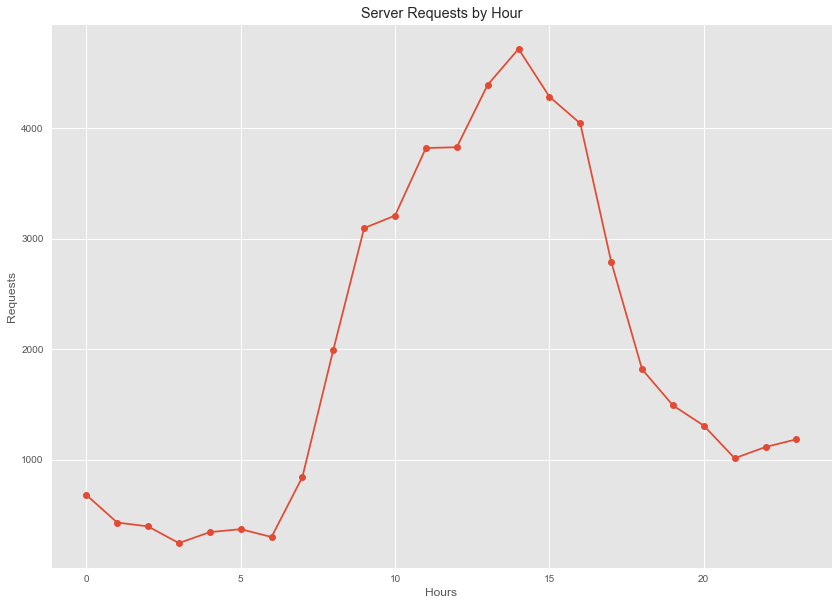

In [141]:
plt.plot(df_group.index,df_group.host_name,'o-')
plt.title('Server Requests by Hour')
plt.xlabel('Hours')
plt.ylabel('Requests')
plt.show()